In [1]:
import sys
sys.path.append('ASCII_UAL')
import ascii_cpo
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import scipy.constants

In [2]:
CS = ascii_cpo.read('CPO_GEM0/ets_coresource_in.cpo', 'coresource')
EQ = ascii_cpo.read('CPO_GEM0/chease_equilibrium_0100.cpo', 'equilibrium')
CP = ascii_cpo.read('CPO_GEM0/ets_coreprof_0100.cpo', 'coreprof')
CTg = ascii_cpo.read('CPO_GEM0/gem0_coretransp_0100.cpo', 'coretransp')
CTi = ascii_cpo.read('CPO_GEM0/imp4dv_coretransp_0100.cpo', 'coretransp')

In [3]:
CS_rho_tor = CS.values[0].rho_tor
EQ_rho_tor = EQ.profiles_1d.rho_tor
CP_rho_tor = CP.rho_tor

volume_fun = scipy.interpolate.UnivariateSpline(EQ_rho_tor, EQ.profiles_1d.volume, s=0.0, k=3)
surface_fun = scipy.interpolate.UnivariateSpline(EQ_rho_tor, EQ.profiles_1d.surface, s=0.0, k=3)
gm3_fun = scipy.interpolate.UnivariateSpline(EQ_rho_tor, EQ.profiles_1d.gm3, s=0.0, k=3)
gm7_fun = scipy.interpolate.UnivariateSpline(EQ_rho_tor, EQ.profiles_1d.gm7, s=0.0, k=3)

si_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, CS.values[0].si.exp[:,0], s=0.0, k=3)
se_fun = si_fun

si_cp_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.ni.source_term.value[:,0], s=0.0, k=3)
se_cp_fun = si_cp_fun

qe_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, CS.values[0].qe.exp, s=0.0, k=3)
qi_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, CS.values[0].qi.exp[:,0], s=0.0, k=3)

qe_cp_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.te.source_term.value, s=0.0, k=3)
qi_cp_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.ti.source_term.value[:,0], s=0.0, k=3)

In [4]:
### particle source integrals
print("Electron particle source integral %0.6e compared with the flux from the ETS %0.6e" % 
      (np.trapz(se_fun(CS_rho_tor), volume_fun(CS_rho_tor)), CP.ne.flux.flux_dv[-1]))
print("Ion particle source integral %0.6e compared with the flux from the ETS %0.6e" %
      (np.trapz(si_fun(CS_rho_tor), volume_fun(CS_rho_tor)), CP.ni.flux.flux_dv[:,0][-1]))

se_int_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * se_fun(CS_rho_tor)), s=0.0, k=3)

se_cp_int_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * se_cp_fun(CP_rho_tor)), s=0.0, k=3)

si_int_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * si_fun(CS_rho_tor)), s=0.0, k=3)

si_cp_int_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * si_cp_fun(CP_rho_tor)), s=0.0, k=3)

print('Integrals based on a spline fit to np.cumsum form')
print('  Electron total particle source from coresource = %0.6e and from coreprof = %0.6e' %
      (se_int_fun(CS_rho_tor[-1]), se_cp_int_fun(CS_rho_tor[-1])))
print('  Ion total particle source from coresource = %0.6e and from coreprof = %0.6e' %
      (si_int_fun(CS_rho_tor[-1]), si_cp_int_fun(CS_rho_tor[-1])))

Electron particle source integral 2.006077e+21 compared with the flux from the ETS 2.005938e+21
Ion particle source integral 2.006077e+21 compared with the flux from the ETS 2.005938e+21
Integrals based on a spline fit to np.cumsum form
  Electron total particle source from coresource = 1.990653e+21 and from coreprof = 1.990653e+21
  Ion total particle source from coresource = 1.990653e+21 and from coreprof = 1.990653e+21


In [5]:
### electron energy source integrals
print("Electron energy source integral (from coresource) calulated using\n  np.trapz %0.6e and\n  np.cumsum %0.6e and their ratio\n   %0.6f" % 
      (np.trapz(qe_fun(CS_rho_tor), volume_fun(CS_rho_tor)), 
       np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qe_fun(CS_rho_tor))[-1],
       np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qe_fun(CS_rho_tor))[-1] / 
         np.trapz(qe_fun(CS_rho_tor), volume_fun(CS_rho_tor))))

print("Electron energy source integral (from coreprof) calulated using\n  np.trapz %0.6e and\n  np.cumsum %0.6e and their ratio\n   %0.6f" % 
      (np.trapz(qe_cp_fun(CP_rho_tor), volume_fun(CP_rho_tor)), 
       np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qe_cp_fun(CP_rho_tor))[-1],
       np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qe_cp_fun(CP_rho_tor))[-1] / 
         np.trapz(qe_cp_fun(CP_rho_tor), volume_fun(CP_rho_tor))))

qe_int_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qe_fun(CS_rho_tor)), s=0.0, k=3)

qe_cp_int_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qe_cp_fun(CP_rho_tor)), s=0.0, k=3)

print("Electron energy source integral (via splines) from coresource %0.6e and coreprof %0.6e" % 
      (qe_int_fun(CS_rho_tor[-1]),qe_cp_int_fun(CS_rho_tor[-1])))

Electron energy source integral (from coresource) calulated using
  np.trapz 2.516806e+06 and
  np.cumsum 2.489024e+06 and their ratio
   0.988962
Electron energy source integral (from coreprof) calulated using
  np.trapz 2.824382e+06 and
  np.cumsum 2.830904e+06 and their ratio
   1.002309
Electron energy source integral (via splines) from coresource 2.489024e+06 and coreprof 2.830903e+06


In [6]:
### ion energy source integrals
print("Ion energy source integral (from coresource) calulated using\n  np.trapz %0.6e and\n  np.cumsum %0.6e and their ratio\n   %0.6f" % 
      (np.trapz(qi_fun(CS_rho_tor), volume_fun(CS_rho_tor)), 
       np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qi_fun(CS_rho_tor))[-1],
       np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qi_fun(CS_rho_tor))[-1] / 
         np.trapz(qi_fun(CS_rho_tor), volume_fun(CS_rho_tor))))

print("Ion energy source integral (from coreprof) calulated using\n  np.trapz %0.6e and\n  np.cumsum %0.6e and their ratio\n   %0.6f" % 
      (np.trapz(qi_cp_fun(CP_rho_tor), volume_fun(CP_rho_tor)), 
       np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qi_cp_fun(CP_rho_tor))[-1],
       np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qi_cp_fun(CP_rho_tor))[-1] / 
         np.trapz(qi_cp_fun(CP_rho_tor), volume_fun(CP_rho_tor))))

qi_int_fun = scipy.interpolate.UnivariateSpline(CS_rho_tor, np.cumsum(np.diff(volume_fun(CS_rho_tor), prepend=0) * qi_fun(CS_rho_tor)), s=0.0, k=3)

qi_cp_int_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, np.cumsum(np.diff(volume_fun(CP_rho_tor), prepend=0) * qi_cp_fun(CP_rho_tor)), s=0.0, k=3)

print("Ion energy source integral (via splines) from coresource %0.6e and coreprof %0.6e" % 
      (qi_int_fun(CS_rho_tor[-1]),qi_cp_int_fun(CS_rho_tor[-1])))

Ion energy source integral (from coresource) calulated using
  np.trapz 2.516806e+06 and
  np.cumsum 2.489024e+06 and their ratio
   0.988962
Ion energy source integral (from coreprof) calulated using
  np.trapz 2.209029e+06 and
  np.cumsum 2.146943e+06 and their ratio
   0.971894
Ion energy source integral (via splines) from coresource 2.489024e+06 and coreprof 2.146944e+06


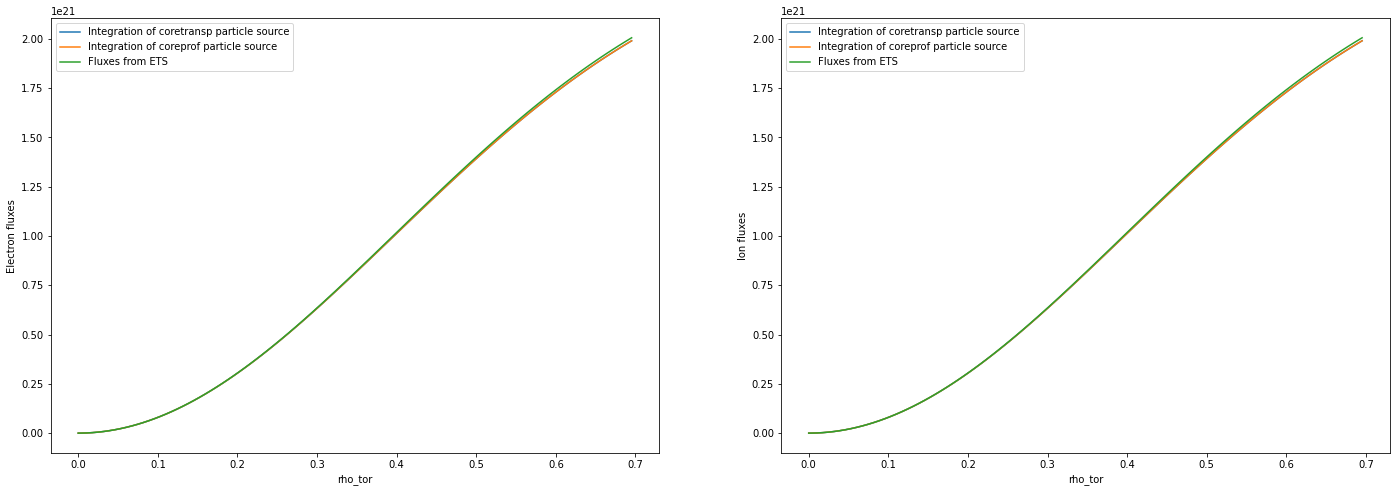

In [7]:
### Compare integrals and fluxes: particles
fig, ax = plt.subplots(1, 2, figsize=(24,8))
plt.subplot(1,2,1)
plt.plot(CP_rho_tor, se_int_fun(CP_rho_tor), label='Integration of coretransp particle source')
plt.plot(CP_rho_tor, se_cp_int_fun(CP_rho_tor), label='Integration of coreprof particle source')
plt.plot(CP_rho_tor, CP.ne.flux.flux_dv, label='Fluxes from ETS')
plt.legend(loc=0) ; plt.xlabel('rho_tor') ; plt.ylabel('Electron fluxes');
plt.subplot(1,2,2)
plt.plot(CP_rho_tor, si_int_fun(CP_rho_tor), label='Integration of coretransp particle source')
plt.plot(CP_rho_tor, si_cp_int_fun(CP_rho_tor), label='Integration of coreprof particle source')
plt.plot(CP_rho_tor, CP.ni.flux.flux_dv[:,0], label='Fluxes from ETS')
plt.legend(loc=0) ; plt.xlabel('rho_tor') ; plt.ylabel('Ion fluxes');

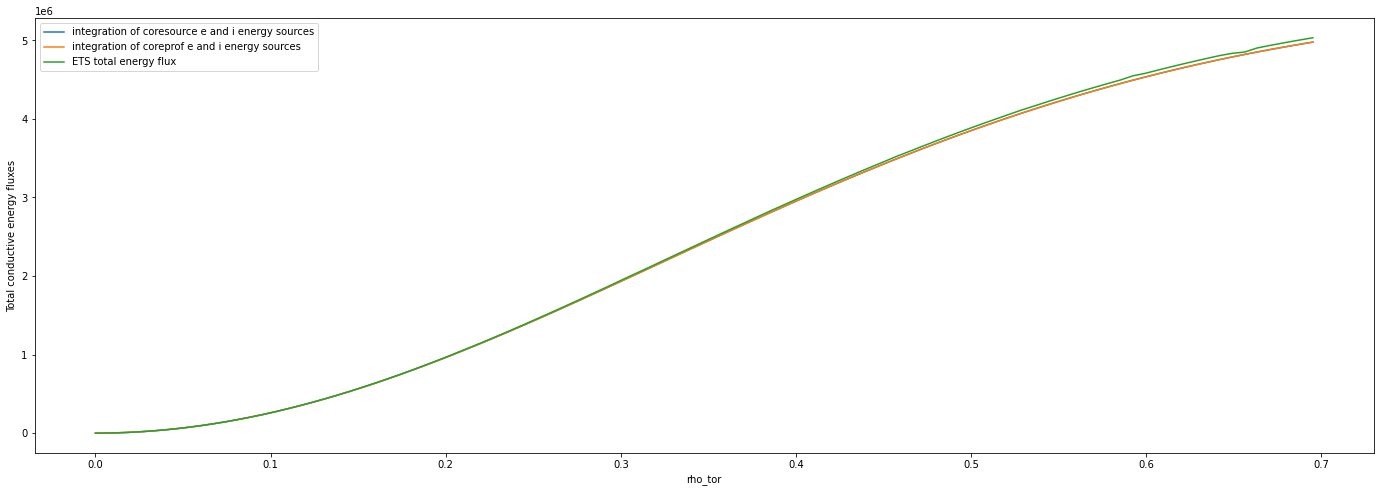

In [8]:
### Compare integrals and fluxes: total energy

Q = qi_int_fun(CP_rho_tor) + qe_int_fun(CP_rho_tor)
Q_cp = qi_cp_int_fun(CP_rho_tor) + qe_cp_int_fun(CP_rho_tor)
G_total = CP.te.flux.flux_dv + CP.ti.flux.flux_dv[:,0]
G_conv = (CP.ne.flux.flux_dv*CP.te.value + CP.ni.flux.flux_dv[:,0]*CP.ti.value[:,0]) * scipy.constants.eV
G_cond = G_total - 1.5 * G_conv

fig, ax = plt.subplots(1, 1, figsize=(24,8))
plt.subplot(1,1,1)
plt.plot(CP_rho_tor, Q, label='integration of coresource e and i energy sources')
plt.plot(CP_rho_tor, Q_cp, label='integration of coreprof e and i energy sources')
plt.plot(CP_rho_tor, G_total, label='ETS total energy flux')
plt.legend(loc=0) ; plt.xlabel('rho_tor') ; plt.ylabel('Total conductive energy fluxes');

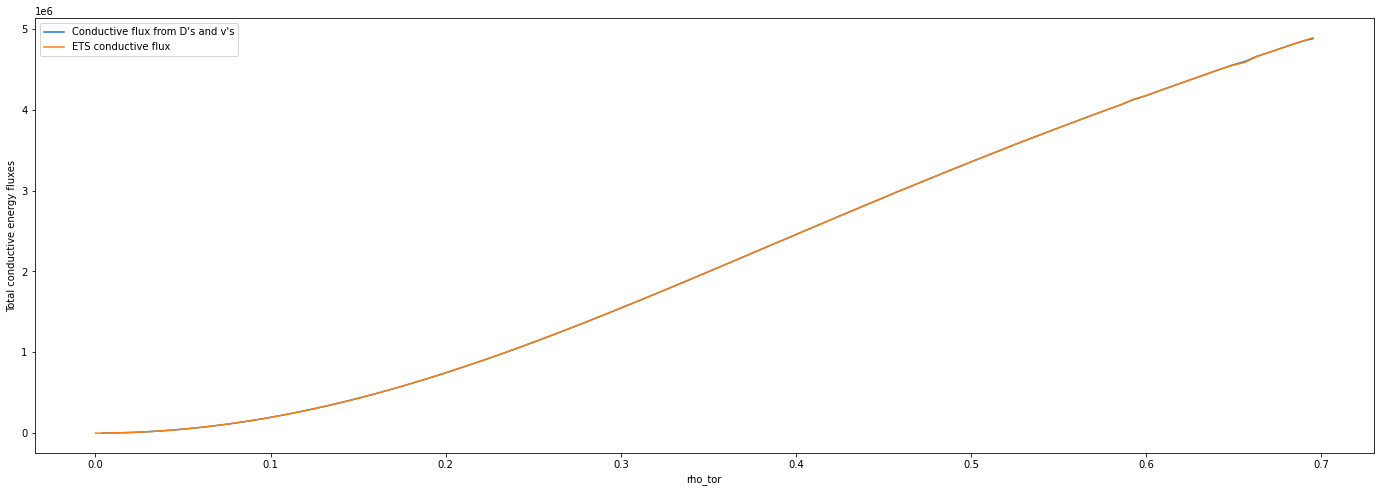

In [9]:
### Reconciliation of transport coefficients and fluxes

te_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.te.value, s=0.0, k=3)
ne_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.ne.value, s=0.0, k=3)
ti_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.ti.value[:,0], s=0.0, k=3)
ni_fun = scipy.interpolate.UnivariateSpline(CP_rho_tor, CP.ni.value[:,0], s=0.0, k=3)

def S_eq(rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, n_fun, D, v):
    return volume_fun(rho_tor, nu=1) / surface_fun(rho_tor) * (- D * n_fun(rho_tor, nu=1) * gm3_fun(rho_tor) +  v  * n_fun(rho_tor) * gm7_fun(rho_tor))

def Q_eq(rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, t_fun, n_fun, D, v):
    return volume_fun(rho_tor, nu=1) / surface_fun(rho_tor) * (- D * t_fun(rho_tor, nu=1) * gm3_fun(rho_tor) +  v * t_fun(rho_tor) * gm7_fun(rho_tor)) * n_fun(rho_tor) * scipy.constants.eV

Q_e_eq = Q_eq(CP_rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, te_fun, ne_fun, CP.te.transp_coef.diff, CP.te.transp_coef.vconv)
Q_i_eq = Q_eq(CP_rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, ti_fun, ni_fun, CP.te.transp_coef.diff, CP.ti.transp_coef.vconv[:,0] )

S_CP = surface_fun(CP_rho_tor)

fig, ax = plt.subplots(1, 1, figsize=(24,8))
plt.subplot(1,1,1)
plt.plot(CP_rho_tor[1:], ((Q_e_eq + Q_i_eq) * S_CP)[1:], label="Conductive flux from D's and v's")
plt.plot(CP_rho_tor, G_cond, label='ETS conductive flux')
plt.legend(loc=0) ; plt.xlabel('rho_tor') ; plt.ylabel('Total conductive energy fluxes');

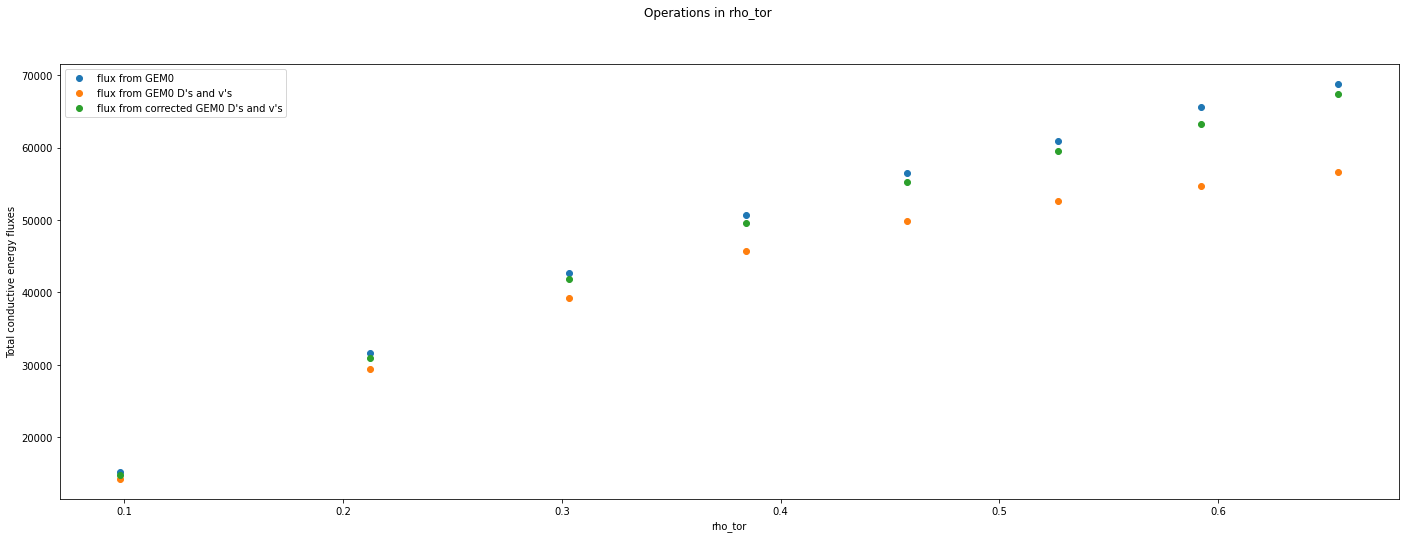

In [10]:
### Reconciliation of transport coefficients and fluxes, GEM0
CTg0 = CTg.values[0]
Q_e_eq_GEM0 = Q_eq(CTg0.rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, te_fun, ne_fun, CTg0.te_transp.diff_eff, CTg0.te_transp.vconv_eff)
Q_i_eq_GEM0 = Q_eq(CTg0.rho_tor, volume_fun, surface_fun, gm3_fun, gm7_fun, ti_fun, ni_fun, CTg0.te_transp.diff_eff, CTg0.te_transp.vconv_eff)

CorrFac = (CTg0.rho_tor*0+1) / (volume_fun(CTg0.rho_tor, nu=1) / surface_fun(CTg0.rho_tor))

fig, ax = plt.subplots(1, 1, figsize=(24,8))
plt.subplot(1,1,1)
plt.plot(CTg0.rho_tor, CTg0.te_transp.flux, 'o', label="flux from GEM0")
plt.plot(CTg0.rho_tor, Q_e_eq_GEM0, 'o', label="flux from GEM0 D's and v's")
plt.plot(CTg0.rho_tor, Q_e_eq_GEM0 * CorrFac, 'o', label="flux from corrected GEM0 D's and v's")
plt.legend(loc=0) ; plt.xlabel('rho_tor') ; plt.ylabel('Total conductive energy fluxes')
plt.suptitle('Operations in rho_tor');

In [11]:
### equivalent operations in rho_tor_norm

rho_tor_sep_eq = EQ.profiles_1d.rho_tor[-1]
rho_tor_sep_cs = CS.values[0].rho_tor[-1]
rho_tor_sep_cp = CP.rho_tor[-1]

CS_rho_tor_norm = CS.values[0].rho_tor / CS.values[0].rho_tor[-1]
EQ_rho_tor_norm = EQ.profiles_1d.rho_tor / EQ.profiles_1d.rho_tor[-1]
CP_rho_tor_norm = CP.rho_tor / CP.rho_tor[-1]

volume_fun_norm = scipy.interpolate.UnivariateSpline(EQ_rho_tor_norm, EQ.profiles_1d.volume, s=0.0, k=3)
surface_fun_norm = scipy.interpolate.UnivariateSpline(EQ_rho_tor_norm, EQ.profiles_1d.surface, s=0.0, k=3)
gm3_fun_norm = scipy.interpolate.UnivariateSpline(EQ_rho_tor_norm, EQ.profiles_1d.gm3 / rho_tor_sep_eq**2, s=0.0, k=3)
gm7_fun_norm = scipy.interpolate.UnivariateSpline(EQ_rho_tor_norm, EQ.profiles_1d.gm7 / rho_tor_sep_eq, s=0.0, k=3)

te_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.te.value, s=0.0, k=3)
ne_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.ne.value, s=0.0, k=3)
ti_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.ti.value[:,0], s=0.0, k=3)
ni_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.ni.value[:,0], s=0.0, k=3)

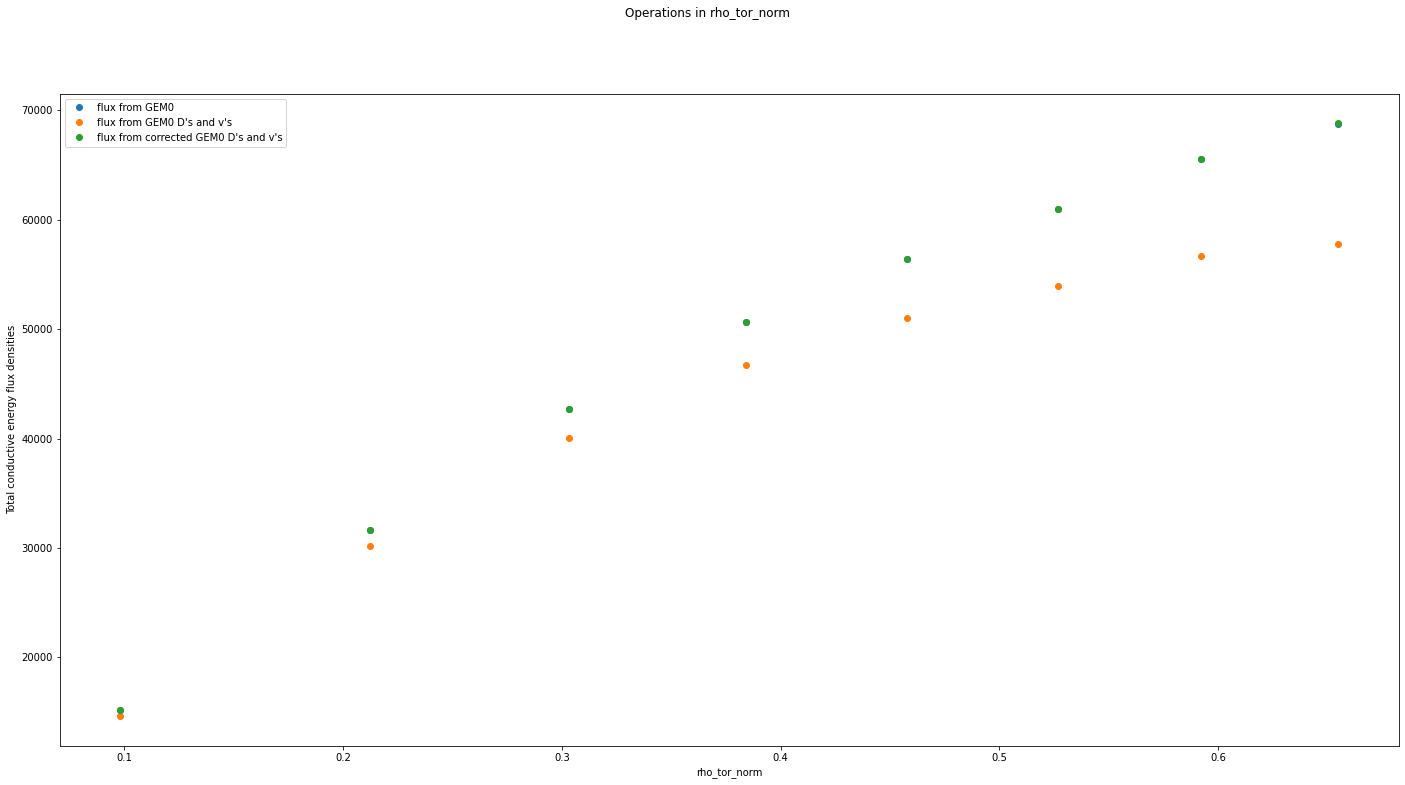

In [12]:
### Reconciliation of transport coefficients and fluxes, GEM0 (normed)

Q_e_eq_GEM0_norm = Q_eq(CTg0.rho_tor_norm, volume_fun_norm, surface_fun_norm, gm3_fun_norm, gm7_fun_norm, te_fun_norm, ne_fun_norm, CTg0.te_transp.diff_eff, CTg0.te_transp.vconv_eff)
Q_i_eq_GEM0_norm = Q_eq(CTg0.rho_tor_norm, volume_fun_norm, surface_fun_norm, gm3_fun_norm, gm7_fun_norm, ti_fun_norm, ni_fun_norm, CTg0.te_transp.diff_eff, CTg0.te_transp.vconv_eff)

CorrFac_norm = (CTg0.rho_tor_norm*0+rho_tor_sep_eq) / (volume_fun_norm(CTg0.rho_tor_norm, nu=1) / surface_fun_norm(CTg0.rho_tor_norm))

fig, ax = plt.subplots(1, 1, figsize=(24,12))
plt.subplot(1,1,1)
plt.plot(CTg0.rho_tor, CTg0.te_transp.flux, 'o', label="flux from GEM0")
plt.plot(CTg0.rho_tor, Q_e_eq_GEM0_norm, 'o', label="flux from GEM0 D's and v's")
plt.plot(CTg0.rho_tor, Q_e_eq_GEM0_norm * CorrFac_norm, 'o', label="flux from corrected GEM0 D's and v's")
plt.legend(loc=0) ; plt.xlabel('rho_tor_norm') ; plt.ylabel('Total conductive energy flux densities')
plt.suptitle('Operations in rho_tor_norm');

In [13]:
### work in norm space

qe_fun_norm = scipy.interpolate.UnivariateSpline(CS_rho_tor_norm, CS.values[0].qe.exp, s=0.0, k=3)
qi_fun_norm = scipy.interpolate.UnivariateSpline(CS_rho_tor_norm, CS.values[0].qi.exp[:,0], s=0.0, k=3)

qe_cp_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.te.source_term.value, s=0.0, k=3)
qi_cp_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, CP.ti.source_term.value[:,0], s=0.0, k=3)

qe_int_fun_norm = scipy.interpolate.UnivariateSpline(CS_rho_tor_norm, np.cumsum(np.diff(volume_fun_norm(CS_rho_tor_norm), prepend=0) * qe_fun_norm(CS_rho_tor_norm)), s=0.0, k=3)
print(qe_int_fun_norm(CS_rho_tor_norm[-1]))
#2420337.54471861  ## was 2489024.10383127 in rho_tor space

qe_cp_int_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, np.cumsum(np.diff(volume_fun_norm(CP_rho_tor_norm), prepend=0) * qe_cp_fun_norm(CP_rho_tor_norm)), s=0.0, k=3)
print(qe_cp_int_fun_norm(CS_rho_tor_norm[-1]))
#2754023.38896918  ## was 2830903.34250287 in rho_tor space

qi_int_fun_norm = scipy.interpolate.UnivariateSpline(CS_rho_tor_norm, np.cumsum(np.diff(volume_fun_norm(CS_rho_tor_norm), prepend=0) * qi_fun_norm(CS_rho_tor_norm)), s=0.0, k=3)
print(qi_int_fun_norm(CS_rho_tor_norm[-1]))
#2420337.54471861  ## was 2489024.10383127 in rho_tor space

qi_cp_int_fun_norm = scipy.interpolate.UnivariateSpline(CP_rho_tor_norm, np.cumsum(np.diff(volume_fun_norm(CP_rho_tor_norm), prepend=0) * qi_cp_fun_norm(CP_rho_tor_norm)), s=0.0, k=3)
print(qi_cp_int_fun_norm(CS_rho_tor_norm[-1]))
#2086454.85907723  ## was 2146943.51450852 in rho_tor space

2420337.5447186143
2754023.3889691774
2420337.5447186143
2086454.85907723
